## Data Import and Matrix Split

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Fill in gender in R1 and R2 matrix

In [2]:
df = pd.read_csv('Intersection_Y1R1R2_0702Y1_R1_R2_on_0702clean_data.csv')

In [3]:
df = pd.read_csv('Intersection_Y1R1R2_0702Y1_0702.csv')
Y1 = df.loc[:, 'UniqueID':'t39_combo']
Y1['RiskFactor'] = df['RiskFactor']
Y1['Gender'] = df['Gender']

In [4]:
df.head()

,Unnamed: 0,UniqueID,a1_combo,a2_combo,a3_combo,a4_combo,a5_combo,a6_combo,b7_combo,b8_combo,...,Section_f,Section_g,Section_h,Section_t,Section_ij_6mos,Section_ij_ever,ClientType,PR: Max Last Status,Dismissal Reason,RiskFactor
0,0,10358.0,3.0,5.0,4.0,5.0,4.0,3.0,3.0,2.0,...,1,0,4,1.0,2,8.0,Secondary Prevention,Graduated program successfully,NaN,8
1,3,10383.0,4.0,5.0,4.0,4.0,5.0,3.0,3.0,3.0,...,4,4,4,3.0,4,15.0,Secondary Prevention,Other (specify),NaN,9
2,6,10392.0,3.0,5.0,3.0,1.0,3.0,1.0,5.0,3.0,...,0,1,0,0.0,0,2.0,Secondary Prevention,Graduated program successfully,NaN,4
3,9,10393.0,2.0,3.0,4.0,2.0,3.0,2.0,4.0,3.0,...,1,2,4,3.0,1,10.0,Secondary Prevention,Graduated program successfully,NaN,9
4,12,10397.0,3.0,5.0,2.0,4.0,3.0,3.0,4.0,3.0,...,1,2,0,0.0,0,3.0,Secondary Prevention,Graduated program successfully,NaN,6


In [5]:
df = pd.read_csv('Intersection_Y1R1R2_0702R1_0702.csv')
R1 = df.loc[:, 'UniqueID':'t39_combo']
R1['RiskFactor'] = df['RiskFactor']
R1['Gender'] = df['Gender']

In [6]:
df = pd.read_csv('Intersection_Y1R1R2_0702R2_0702.csv')
R2 = df.loc[:, 'UniqueID':'t39_combo']
R2['RiskFactor'] = df['RiskFactor']
R2['Gender'] = df['Gender']

In [7]:
# change all nan gender values in R1 according to their values in Y1

for index in R1.index:
    if pd.isnull(R1.loc[index, 'Gender']):
        gender = Y1.loc[index,'Gender']
        R1.loc[index, 'Gender'] = gender

In [8]:
# change all nan gender values in R2 according to their values in Y1

for index in R2.index:
    if pd.isnull(R2.loc[index, 'Gender']):
        gender = Y1.loc[index,'Gender']
        R2.loc[index, 'Gender'] = gender

In [9]:
Gender_Incos = []
for index in Y1.index:
    if (Y1.loc[index, 'Gender'] != R1.loc[index, 'Gender']) or (R1.loc[index, 'Gender'] != R2.loc[index, 'Gender']) or (Y1.loc[index, 'Gender'] != R2.loc[index, 'Gender']) :
        Gender_Incos.append(Y1.loc[index, 'UniqueID'])

### Drop IDs with Nan values

In [10]:
#indices
columns = Y1.columns.tolist()
columns = columns[:-1]

#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(Y1[Y1[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list = list(my_set)
unique_index_list

[]

In [11]:
#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(R1[R1[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list1 = list(my_set)
unique_index_list1

[]

In [12]:
#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(R2[R2[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list2 = list(my_set)
unique_index_list2

[]

In [13]:
#make list of UniqueIDs associated with these NaN values
ID_list = []
for i in unique_index_list1:
    ID_list.append(R1.loc[i,'UniqueID'])
ID_list

[]

In [14]:
#make list of UniqueIDs associated with these NaN values
for i in unique_index_list2:
    ID_list.append(R2.loc[i,'UniqueID'])
ID_list

[]

In [15]:
ID_list.extend(Gender_Incos)

In [16]:
ID_list

[11177.0,
 11195.0,
 11218.0,
 11394.0,
 11419.0,
 11752.0,
 12926.0,
 12952.0,
 13071.0,
 17040.0,
 17651.0,
 17851.0,
 17959.0,
 21493.0,
 22624.0,
 28767.0,
 29298.0,
 29415.0,
 29542.0,
 29704.0,
 31457.0,
 31947.0,
 32298.0,
 33616.0,
 34230.0,
 41607.0]

In [17]:
#drop these IDs from the data
for id in ID_list:
    Y1 = Y1[Y1['UniqueID']!=id]

In [18]:
#drop these IDs from the data
for id in ID_list:
    R1 = R1[R1['UniqueID']!=id]

In [19]:
#drop these IDs from the data
for id in ID_list:
    R2 = R2[R2['UniqueID']!=id]

## Split each matrix by Gender

In [20]:
Y1_M = Y1[Y1['Gender'] == 1]
Y1_F = Y1[Y1['Gender'] == 2]
Y1_M = Y1_M.drop('UniqueID', axis=1)
Y1_F = Y1_F.drop('UniqueID', axis=1)
Y1_M = Y1_M.drop('Gender', axis=1)
Y1_F = Y1_F.drop('Gender', axis=1)
Y1_M = Y1_M.transpose()
Y1_F = Y1_F.transpose()

In [21]:
Y1_M.shape

(40, 933)

In [22]:
Y1_F.shape

(40, 588)

In [23]:
R1_M = R1[R1['Gender'] == 1]
R1_F = R1[R1['Gender'] == 2]
R1_M = R1_M.drop('UniqueID', axis=1)
R1_F = R1_F.drop('UniqueID', axis=1)
R1_M = R1_M.drop('Gender', axis=1)
R1_F = R1_F.drop('Gender', axis=1)
R1_M = R1_M.transpose()
R1_F = R1_F.transpose()
R1_M.shape

(40, 933)

In [24]:
R1_F.shape

(40, 588)

In [25]:
R2_M = R2[R2['Gender'] == 1]
R2_F = R2[R2['Gender'] == 2]
R2_M = R2_M.drop('UniqueID', axis=1)
R2_F = R2_F.drop('UniqueID', axis=1)
R2_M = R2_M.drop('Gender', axis=1)
R2_F = R2_F.drop('Gender', axis=1)
R2_M = R2_M.transpose()
R2_F = R2_F.transpose()
R2_M.shape

(40, 933)

## Standardize all responses to (0,1)

In [26]:
for i in range(933):
    Y1_M.iloc[37,i]=Y1_M.iloc[37,i]+1
    Y1_M.iloc[38,i]=Y1_M.iloc[38,i]+1   
    R1_M.iloc[37,i]=R1_M.iloc[37,i]+1    
    R1_M.iloc[38,i]=R1_M.iloc[38,i]+1       
    R2_M.iloc[37,i]=R2_M.iloc[37,i]+1    
    R2_M.iloc[38,i]=R2_M.iloc[38,i]+1
    
for i in range(588): 
    Y1_F.iloc[37,i]=Y1_F.iloc[37,i]+1
    Y1_F.iloc[38,i]=Y1_F.iloc[38,i]+1
    R1_F.iloc[37,i]=R1_F.iloc[37,i]+1
    R1_F.iloc[38,i]=R1_F.iloc[38,i]+1
    R2_F.iloc[37,i]=R2_F.iloc[37,i]+1
    R2_F.iloc[38,i]=R2_F.iloc[38,i]+1

In [27]:
newlist=[]
for i in range(9):
    newlist.append(i)
for i in range(16,39):
    newlist.append(i)

In [28]:
for i in newlist:
    for j in range (933):
        Y1_M.iloc[i,j]=(Y1_M.iloc[i,j]-1)/4
        R1_M.iloc[i,j]=(R1_M.iloc[i,j]-1)/4
        R2_M.iloc[i,j]=(R2_M.iloc[i,j]-1)/4
        
for i in newlist:
    for j in range (588):
        Y1_F.iloc[i,j]=(Y1_F.iloc[i,j]-1)/4
        R1_F.iloc[i,j]=(R1_F.iloc[i,j]-1)/4
        R2_F.iloc[i,j]=(R2_F.iloc[i,j]-1)/4
        
for j in range (933):
        Y1_M.iloc[39,j]=Y1_M.iloc[39,j]/9
        R1_M.iloc[39,j]=R1_M.iloc[39,j]/9
        R2_M.iloc[39,j]=R2_M.iloc[39,j]/9

for j in range (588):
        Y1_F.iloc[39,j]=Y1_F.iloc[39,j]/9
        R1_F.iloc[39,j]=R1_F.iloc[39,j]/9
        R2_F.iloc[39,j]=R2_F.iloc[39,j]/9

## DMD for Gender

### Y1 to R1

#### Female Y1 to R1

In [29]:
U_Y1F,Sig_Y1F,V_Y1F=np.linalg.svd(Y1_F, full_matrices=False)    
U_Y1F_T=U_Y1F.conjugate().transpose()
V_Y1F_T=V_Y1F.conjugate().transpose()
Sig_inv_Y1F=np.zeros((40, 40))
for i in range(40):
    for j in range(40):
        if i==j:
            Sig_inv_Y1F[i][j]=1/Sig_Y1F[i]

In [30]:
A_step1=np.dot(R1_F,V_Y1F_T)
A_step2=np.dot(A_step1,Sig_inv_Y1F)
A_Y1F_R1=np.dot(A_step2,U_Y1F_T)
A_Y1F_R1

array([[ 1.96481712e-01,  1.91685808e-02, -5.76299373e-02, ...,
         2.67341658e-02,  2.26922012e-02,  3.93686283e-02],
       [ 1.06605427e-02,  3.31251659e-01,  1.30718984e-01, ...,
         8.53186488e-02, -2.69091164e-02, -9.21938935e-02],
       [-2.05773013e-02,  2.19016357e-02,  1.96855823e-01, ...,
         6.81014631e-02, -1.10464760e-03, -8.02136918e-02],
       ...,
       [-1.92800330e-02,  6.40778368e-02,  9.12441762e-02, ...,
         3.70091993e-01,  5.60473395e-02, -1.41698117e-01],
       [-4.20858540e-02,  1.02107584e-01,  1.49223540e-04, ...,
         5.89355146e-02,  5.67859201e-01, -2.12107731e-02],
       [-9.75484687e-03,  1.19192025e-01,  4.58303468e-02, ...,
         1.08216452e-01,  3.08913946e-02,  7.75585352e-02]])

In [31]:
values_Y1_F, vectors_Y1_F = np.linalg.eig(A_Y1F_R1)

In [32]:
eiglog_Y1_F = np.log(values_Y1_F)

In [33]:
lamphi_Y1_F=np.zeros(40)
for i in range (40):
    rep=vectors_Y1_F[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_Y1_F[i])*norm
    lamphi_Y1_F[i]=val

#### Male Y1 to R1

In [34]:
U_Y1M,Sig_Y1M,V_Y1M=np.linalg.svd(Y1_M, full_matrices=False)    
U_Y1M_T=U_Y1M.conjugate().transpose()
V_Y1M_T=V_Y1M.conjugate().transpose()
Sig_inv_Y1M=np.zeros((40, 40))
for i in range(40):
    for j in range(40):
        if i==j:
            Sig_inv_Y1M[i][j]=1/Sig_Y1M[i]

In [35]:
A_step1=np.dot(R1_M,V_Y1M_T)
A_step2=np.dot(A_step1,Sig_inv_Y1M)
A_Y1M_R1=np.dot(A_step2,U_Y1M_T)
A_Y1M_R1

array([[ 2.17166533e-01, -1.51583395e-02, -2.17318853e-04, ...,
         4.70853793e-02, -2.46797667e-02, -9.38410657e-02],
       [ 7.59116031e-03,  3.19782283e-01,  6.57770926e-03, ...,
         1.48037527e-02, -3.73807895e-02, -7.54413162e-02],
       [ 4.97096281e-02, -3.65014267e-03,  1.76177298e-01, ...,
         3.53366528e-02, -3.66699840e-02, -2.32746709e-02],
       ...,
       [-1.52440963e-02, -4.62542535e-02, -7.10161798e-03, ...,
         3.16113629e-01,  8.91346524e-02, -2.39713108e-01],
       [-8.01646117e-02, -1.23541966e-01,  3.87783723e-02, ...,
         4.81491086e-02,  4.35309346e-01,  3.90276607e-02],
       [-4.04952847e-03, -2.30042220e-02,  5.14687229e-02, ...,
         9.17473321e-02,  6.79998474e-03, -1.13671248e-01]])

In [36]:
values_Y1_M, vectors_Y1_M = np.linalg.eig(A_Y1M_R1)

In [37]:
eiglog_Y1_M = np.log(values_Y1_M)

In [38]:
lamphi_Y1_M=np.zeros(40)
for i in range (40):
    rep=vectors_Y1_M[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_Y1_M[i])*norm
    lamphi_Y1_M[i]=val

### R1 to R2

#### Female R1 to R2

In [39]:
U_R1F,Sig_R1F,V_R1F=np.linalg.svd(R1_F, full_matrices=False)    
U_R1F_T=U_R1F.conjugate().transpose()
V_R1F_T=V_R1F.conjugate().transpose()
Sig_inv_R1F=np.zeros((40, 40))
for i in range(40):
    for j in range(40):
        if i==j:
            Sig_inv_R1F[i][j]=1/Sig_R1F[i]

In [40]:
A_step1=np.dot(R2_F,V_R1F_T)
A_step2=np.dot(A_step1,Sig_inv_R1F)
A_R1F_R2=np.dot(A_step2,U_R1F_T)
A_R1F_R2

array([[ 0.19660151,  0.08700029,  0.05504705, ...,  0.03071846,
         0.01884593,  0.0039101 ],
       [-0.09023071,  0.38378719,  0.06814504, ...,  0.07307031,
         0.05997939, -0.24468949],
       [-0.05231261,  0.10018537,  0.26666684, ...,  0.01577858,
        -0.01113894, -0.16584615],
       ...,
       [-0.02271462,  0.04027602, -0.01224309, ...,  0.21419469,
         0.04506737, -0.17865858],
       [ 0.01043452,  0.03758256, -0.05114881, ...,  0.02769049,
         0.54986635, -0.0958961 ],
       [ 0.0319103 ,  0.02414227,  0.01946357, ...,  0.05892295,
         0.09271581, -0.10038457]])

In [41]:
values_R1_F, vectors_R1_F = np.linalg.eig(A_R1F_R2)

In [42]:
eiglog_R1_F = np.log(values_R1_F)

In [43]:
lamphi_R1_F=np.zeros(40)
for i in range (40):
    rep=vectors_R1_F[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_R1_F[i])*norm
    lamphi_R1_F[i]=val

#### Male R1 to R2

In [44]:
U_R1M,Sig_R1M,V_R1M=np.linalg.svd(R1_M, full_matrices=False)    
U_R1M_T=U_R1M.conjugate().transpose()
V_R1M_T=V_R1M.conjugate().transpose()
Sig_inv_R1M=np.zeros((40, 40))
for i in range(40):
    for j in range(40):
        if i==j:
            Sig_inv_R1M[i][j]=1/Sig_R1M[i]

In [45]:
A_step1=np.dot(R2_M,V_R1M_T)
A_step2=np.dot(A_step1,Sig_inv_R1M)
A_R1M_R2=np.dot(A_step2,U_R1M_T)
A_R1M_R2

array([[ 0.19320513,  0.11434351,  0.03710802, ...,  0.05649326,
         0.01942554, -0.13921053],
       [-0.06395086,  0.40564811,  0.16187217, ...,  0.03765019,
         0.06082476, -0.32930817],
       [-0.01428076,  0.12118856,  0.25235935, ...,  0.09213419,
         0.04473241, -0.23186452],
       ...,
       [-0.02919136,  0.02720721, -0.06639787, ...,  0.39120197,
         0.07625606, -0.10449309],
       [-0.08250111, -0.00985182,  0.00071424, ...,  0.06317316,
         0.52269995, -0.21650769],
       [-0.06692436,  0.05472298,  0.03371883, ...,  0.12892834,
         0.08095056, -0.04238037]])

In [46]:
values_R1_M, vectors_R1_M = np.linalg.eig(A_R1M_R2)

In [47]:
eiglog_R1_M = np.log(values_R1_M)

In [48]:
lamphi_R1_M=np.zeros(40)
for i in range (40):
    rep=vectors_R1_M[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_R1_M[i])*norm
    lamphi_R1_M[i]=val

In [49]:
#Export datasets

df1 = pd.DataFrame(A_Y1F_R1[-1,:][:39])
df1.to_csv('Y1_R1_F_importance.csv')
df2 = pd.DataFrame(A_Y1M_R1[-1,:][:39])
df2.to_csv('Y1_R1_M_importance.csv')
df3 = pd.DataFrame(A_R1F_R2[-1,:][:39])
df3.to_csv('R1_R2_F_importance.csv')
df4 = pd.DataFrame(A_R1M_R2[-1,:][:39])
df4.to_csv('R1_R2_M_importance.csv')

## Graphs

In [50]:
label=['a1', 'a2',
       'a3', 'a4', 'a5', 'a6', 'b7', 'b8',
       'b9', 'c10', 'c11', 'c12', 'c13',
       'c14', 'c15', 'c16', 'de17', 'de18',
       'de19', 'de20', 'f21', 'f22', 'f23o',
       'f24', 'f25', 'f26', 'g27', 'g28',
       'g29', 'g30', 'g31', 'h32', 'h33',
       'h34', 'h35', 'h36', 'h37', 't38',
       't39','RiskFactor']

### PLOTs of the last row in transformation matrix

#### Importance from Y1 to R1 

<BarContainer object of 39 artists>

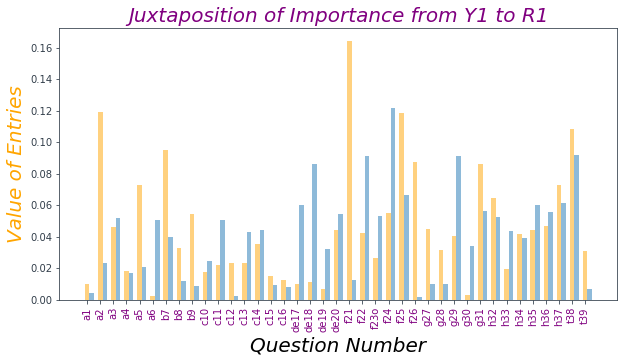

In [56]:
index=np.zeros(39)
for i in range (39):
    index[i]=i
Gender = ['Female','Male']
pos = np.arange(len(index))
bar_width = 0.35
plt.figure(figsize=(10,5))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Juxtaposition of Importance from Y1 to R1', fontsize=20, fontweight=0, color='purple', loc='center', style='italic' ) 
plt.xticks(np.arange(min(index), max(index)+1, 1.0),label, color='purple',rotation='vertical')
plt.xlabel('Question Number',fontsize=20, style='italic' )
plt.ylabel('Value of Entries',fontsize=20, color='orange', style='italic' )
plt.bar(pos,abs(A_Y1F_R1[-1,:][:39]),bar_width,alpha=0.5,color='orange')
plt.bar(pos+bar_width,abs(A_Y1M_R1[-1,:][:39]),bar_width,alpha=0.5)

#### orange represents girls, and blue represents boys 

#### Importance from R1 to R2

<BarContainer object of 39 artists>

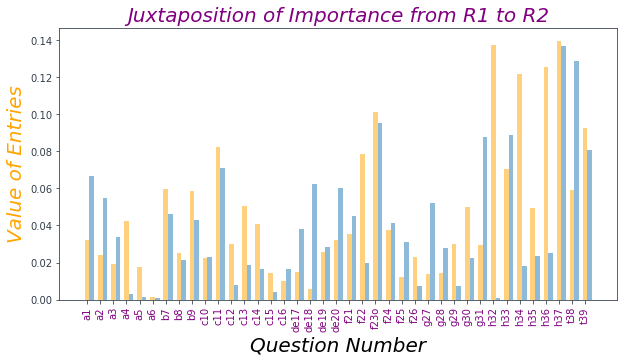

In [55]:
index=np.zeros(39)
for i in range (39):
    index[i]=i
Gender = ['Female','Male']
pos = np.arange(len(index))
bar_width = 0.35
plt.figure(figsize=(10,5))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Juxtaposition of Importance from R1 to R2', fontsize=20, fontweight=0, color='purple', loc='center', style='italic' ) 
plt.xticks(np.arange(min(index), max(index)+1, 1.0),label, color='purple',rotation='vertical')
plt.xlabel('Question Number',fontsize=20, style='italic' )
plt.ylabel('Value of Entries',fontsize=20, color='orange', style='italic' )
plt.bar(pos,abs(A_R1F_R2[-1,:][:39]),bar_width,alpha=0.5,color='orange')
plt.bar(pos+bar_width,abs(A_R1M_R2[-1,:][:39]),bar_width,alpha=0.5)

#### Change in girls

<BarContainer object of 39 artists>

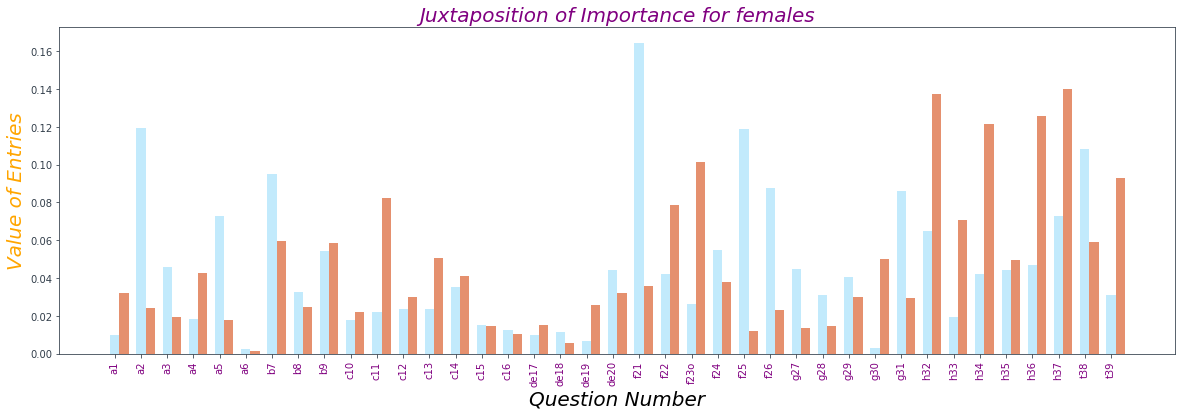

In [53]:
index=np.zeros(39)
for i in range (39):
    index[i]=i
Year = ["Y1 to R1", "R1 to R2"]
pos = np.arange(len(index))
bar_width = 0.35
plt.figure(figsize=(20,6))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Juxtaposition of Importance for females', fontsize=20, fontweight=0, color='purple', loc='center', style='italic' ) 
plt.xticks(np.arange(min(index), max(index)+1, 1.0),label, color='purple',rotation='vertical')
plt.xlabel('Question Number',fontsize=20, style='italic' )
plt.ylabel('Value of Entries',fontsize=20, color='orange', style='italic' )
plt.bar(pos,abs(A_Y1F_R1[-1,:][:39]),bar_width,alpha=0.8,color='#b3e5fc')
plt.bar(pos+bar_width,abs(A_R1F_R2[-1,:][:39]),bar_width,color = '#df744a', alpha=0.8)

#### Yellow represents period from Y1 to R1; Olive represents period from R1 to R2

<BarContainer object of 39 artists>

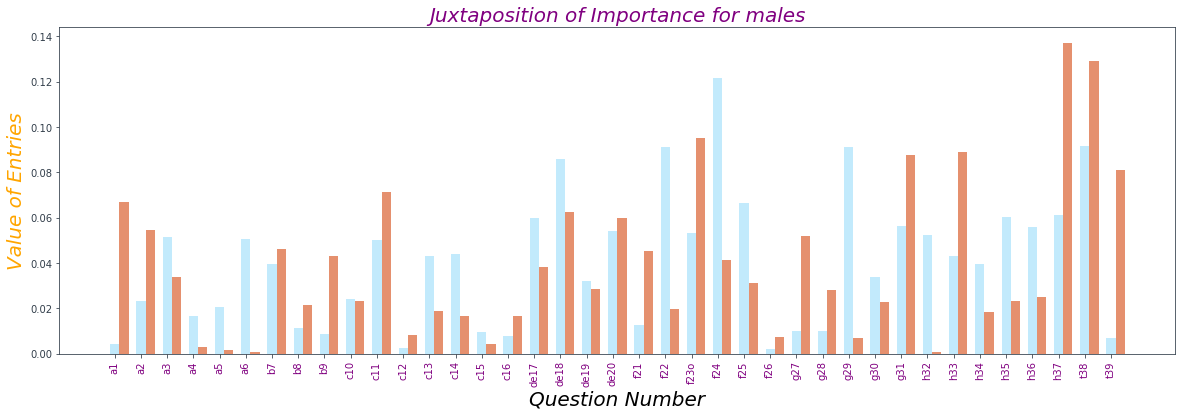

In [54]:
index=np.zeros(39)
for i in range (39):
    index[i]=i
Year = ["Y1 to R1", "R1 to R2"]
pos = np.arange(len(index))
bar_width = 0.35
plt.figure(figsize=(20,6))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Juxtaposition of Importance for males', fontsize=20, fontweight=0, color='purple', loc='center', style='italic' ) 
plt.xticks(np.arange(min(index), max(index)+1, 1.0),label, color='purple',rotation='vertical')
plt.xlabel('Question Number',fontsize=20, style='italic' )
plt.ylabel('Value of Entries',fontsize=20, color='orange', style='italic' )
plt.bar(pos,abs(A_Y1M_R1[-1,:][:39]),bar_width,alpha=0.8,color='#b3e5fc')
plt.bar(pos+bar_width,abs(A_R1M_R2[-1,:][:39]),bar_width,color = '#df744a', alpha=0.8)